In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
print(tf.keras.__version__)

3.8.0


In [ ]:
df = pd.read_csv("wine.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

In [ ]:
X = df.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y = df.iloc[:,-1]
y

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64,input_dim = X_train.shape[1], activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = model.fit(X_train, y_train, epochs=30,validation_data=(X_val, y_val))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 934ms/step - accuracy: 0.5056 - loss: 0.7233 - val_accuracy: 0.5898 - val_loss: 0.7076
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5999 - loss: 0.6947 - val_accuracy: 0.6172 - val_loss: 0.6952
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6002 - loss: 0.6835 - val_accuracy: 0.6328 - val_loss: 0.6829
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6632 - loss: 0.6573 - val_accuracy: 0.6406 - val_loss: 0.6720
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6946 - loss: 0.6362 - val_accuracy: 0.6367 - val_loss: 0.6614
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7158 - loss: 0.6190 - val_accuracy: 0.6367 - val_loss: 0.6514
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7055 - loss: 0.6233 - val_accuracy: 0.6406 - val_loss: 0.6413
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7264 - loss: 0.5877 - val_accuracy: 0.6445 - val_loss: 0.6322

In [ ]:
weights = model.weights
print(weights)

[<Variable path=sequential_4/dense_22/kernel, shape=(11, 64), dtype=float32, value=[[-2.45124087e-01 -8.57434422e-02 -1.77968308e-01  2.70075709e-01
   4.41077463e-02 -1.62749812e-02  4.78520580e-02 -2.67416537e-01
  -1.59310445e-01 -2.80365437e-01  2.04425901e-01 -2.12383084e-02
   8.44762772e-02 -1.68956667e-01 -3.19535546e-02 -1.88419446e-01
  -1.42626673e-01  3.03415000e-01  3.75680290e-02 -1.73872992e-01
  -8.78814533e-02 -2.24609032e-01 -7.72664621e-02  2.53931671e-01
  -2.32461672e-02 -5.47882430e-02  9.79277343e-02  4.92377654e-02
   1.62394941e-01  2.32888713e-01  2.29733288e-01  2.93136947e-02
  -1.60883367e-01 -1.94507092e-01 -3.28258961e-01 -2.85384327e-01
  -5.84074222e-02 -1.08714461e-01 -1.55163519e-02 -1.04311019e-01
  -7.55591393e-02 -2.08519191e-01  1.31080121e-01 -1.24838594e-02
  -1.92290291e-01  2.64510334e-01  2.28788584e-01  2.19027981e-01
  -5.18662483e-02  1.16115645e-01  1.53861716e-01 -1.42873585e-01
  -5.44424541e-02  3.26371938e-01 -1.69228733e-01 -1.561956

In [ ]:
history_df = pd.DataFrame(training_history.history)
print(history_df)

    accuracy      loss  val_accuracy  val_loss
0   0.539683  0.718730      0.589844  0.707636
1   0.587302  0.694682      0.617188  0.695156
2   0.619048  0.675568      0.632812  0.682899
3   0.666667  0.655671      0.640625  0.672002
4   0.682540  0.637958      0.636719  0.661361
5   0.714286  0.621376      0.636719  0.651357
6   0.730159  0.604799      0.640625  0.641328
7   0.730159  0.589286      0.644531  0.632157
8   0.730159  0.574912      0.644531  0.623119
9   0.746032  0.560402      0.644531  0.614162
10  0.761905  0.546800      0.652344  0.605279
11  0.761905  0.533128      0.660156  0.596734
12  0.761905  0.519678      0.656250  0.588572
13  0.777778  0.506387      0.660156  0.580848
14  0.777778  0.493230      0.671875  0.573666
15  0.777778  0.481096      0.683594  0.567041
16  0.809524  0.470040      0.695312  0.560521
17  0.841270  0.458822      0.707031  0.554312
18  0.841270  0.448584      0.707031  0.548630
19  0.841270  0.438520      0.714844  0.543742
20  0.841270 

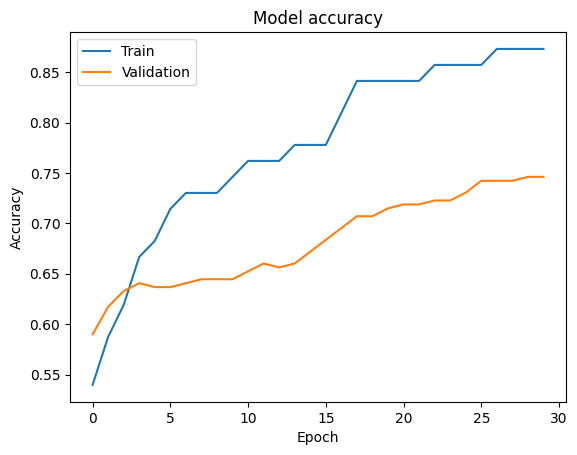

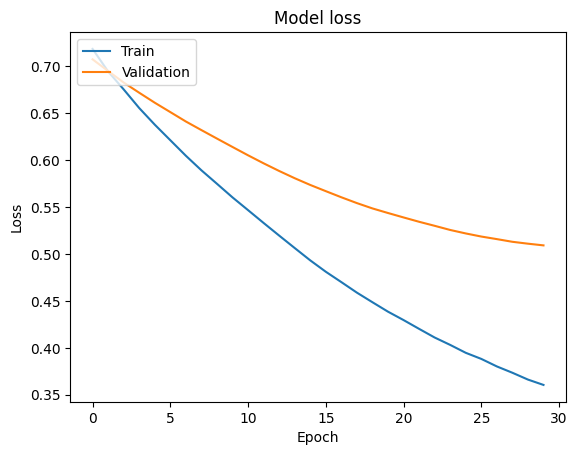

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6240
